# Week9 - Ensemble Assignment

* Train-test split
* Train a random forest model
* Try bagging & boosting algorithms
* Evaluate the models
* Explain findings

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

def generate_dataset():   
    X, y = make_circles(n_samples=1000,noise=0.1, random_state=42)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    
    X1, y1 = make_moons(n_samples=1000, noise=0.1, random_state=42)
    df2 = pd.DataFrame(X1)
    df2['y'] = y
    
    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

In [25]:
X, y = generate_dataset()

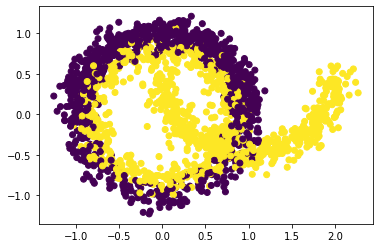

In [26]:
plt.scatter(X[:,0], X[:,1],c=y)

In [27]:
y.value_counts()

y
0    1000
1    1000
Name: count, dtype: int64

The dataset is balanced with both the variables in target variable occuping equal no of samples.

# Train - Test Split

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Pipeline for comparing Random forest with Bagging and Boosting algorithms.

In [19]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Bagging": BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42),
    "Boosting": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=42)
}

In [20]:
for name, model in models.items():
    pipe = Pipeline([
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipe.predict(X_test)
    
    #For evaualting the results
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:")
    print(report)
    print("-------------------------------------")

Random Forest Accuracy: 0.8775
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       209
           1       0.87      0.87      0.87       191

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

-------------------------------------
Bagging Accuracy: 0.8600
Classification Report for Bagging:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       209
           1       0.88      0.82      0.85       191

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

-------------------------------------
Boosting Accuracy: 0.8850
Classification Report for Boosting:
              precision    recall  f1-score   support

           0       0.

### Comparision and Evaluation: 

- Random Forest achieved an overall accuracy of 87.7%
- Bagging algorithm achieved an overall accuracy of 86%
- Boosting algorithm achieved an overall accuracy of 88.5%. In terms of accuracy the boosting model seems to be performing better than the rest.

If we take a closer look at the classification report, we can see and compare the precision, recall and f1 score of the respective model. 

- In terms of precision, Boosting perfoms best with 90% for class 1 and 88% for class 0 on par with random forest model. 
- As for recall, Boosting takes the lead by predicting 91% of values correct for class 0. Overall, random forest model predictions were balanced without huge gap between class 0 and class 1.
- Finally, F1 score shows the boosting model is better at taking the balanced approach between precision and recall metrics. 

Both Boosting an Random forest achieved consistent performance with Boosting model taking lead in performance. Bagging method seems to struggle with class 1. 


In [21]:
def plot_decision_boundary(model, X, y):
    xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.1, X[:,0].max()+0.1, 100),
                         np.linspace(X[:,1].min()-0.1, X[:,1].max()+0.1, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=20, cmap=plt.cm.Paired)


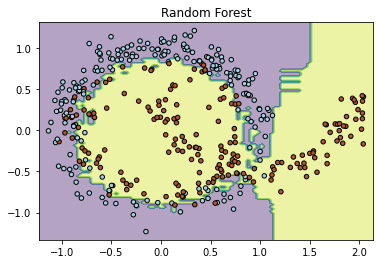

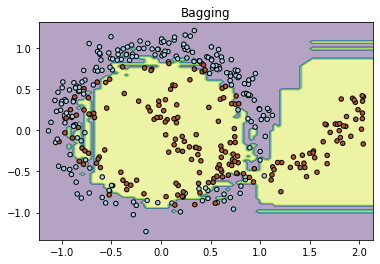

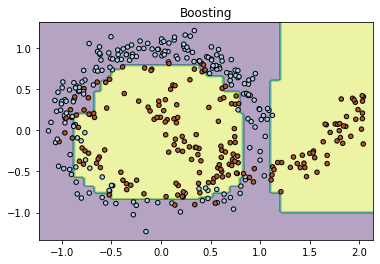

In [22]:
for name, model in models.items():
    plt.figure()
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X_test, y_test)
    plt.title(name)
    plt.show()

- Taking a closer looking to decision boundaries for each model, we can see that boosting model's has a smoother decision boundary compared to Random forest and bagging algorithms. This tells us that Boosting model has generalized the decision boundary which could be the main reason for achieving higher accuracy among three models. 



- This could alse mean the boosting model is less likely to overfit, whereas random forest model's complex boundary indicates there might be possibility of overfiting. 

## Findings : 

- Boosting model has effectively balanced the bias and variance which can be seen in the classification report and less complex decision boundary.This model showed strong performance across the classes and more likely to perform better on unseen data.



- Random forest has good accuracy compared to bagging method, but has complex decision boundary. This suggests there could be a possibility of random forest model overfitting the data. This model may not generalize well on the unseen data. 



- Even after having less accuracy than random forest model, Bagging model still seems to have less complex decision boundary than random forest. This suggests that model is effectively avoiding some overfitting. 